## Acessando as urls com os aquivos disponibilizados
Os arquivos estão disponíveis no Portal Dados Abertos, no conjunto de dados do Ministério do Desenvolvimento e Assistência Social, Família e Combate à Fome (MDS), acessado em https://dados.gov.br/dados/organizacoes/visualizar/ministerio-do-desenvolvimento-e-assistencia-social-familia-e-combate-a-fome

In [72]:
url_cad_2023 = 'https://aplicacoes.mds.gov.br/sagi/servicos/misocial?fq=anomes_s:2023*&wt=csv&omitHeader=true&fq=cadunico_tot_fam_i:{0%20TO%20*]&q=*&fl=ibge:codigo_ibge,anomes:anomes_s,cadunico_tot_fam:cadunico_tot_fam_i,cadunico_tot_pes:cadunico_tot_pes_i,cadunico_tot_fam_rpc_ate_meio_sm:cadunico_tot_fam_rpc_ate_meio_sm_i,cadunico_tot_pes_rpc_ate_meio_sm:cadunico_tot_pes_rpc_ate_meio_sm_i,cadunico_tot_fam_pob:cadunico_tot_fam_pob_i,cadunico_tot_pes_pob:cadunico_tot_pes_pob_i,cadunico_tot_fam_ext_pob:cadunico_tot_fam_ext_pob_i,cadunico_tot_pes_ext_pob:cadunico_tot_pes_ext_pob_i,cadunico_tot_fam_pob_e_ext_pob:cadunico_tot_fam_pob_e_ext_pob_i,cadunico_tot_pes_pob_e_ext_pob:cadunico_tot_pes_pob_e_ext_pob_i&rows=100000000&sort=anomes_s%20desc,%20codigo_ibge%20asc'
url_cad_2022 = 'https://aplicacoes.mds.gov.br/sagi/servicos/misocial?fq=anomes_s:2022*&wt=csv&omitHeader=true&fq=cadunico_tot_fam_i:{0%20TO%20*]&q=*&fl=ibge:codigo_ibge,anomes:anomes_s,cadunico_tot_fam:cadunico_tot_fam_i,cadunico_tot_pes:cadunico_tot_pes_i,cadunico_tot_fam_rpc_ate_meio_sm:cadunico_tot_fam_rpc_ate_meio_sm_i,cadunico_tot_pes_rpc_ate_meio_sm:cadunico_tot_pes_rpc_ate_meio_sm_i,cadunico_tot_fam_pob:cadunico_tot_fam_pob_i,cadunico_tot_pes_pob:cadunico_tot_pes_pob_i,cadunico_tot_fam_ext_pob:cadunico_tot_fam_ext_pob_i,cadunico_tot_pes_ext_pob:cadunico_tot_pes_ext_pob_i,cadunico_tot_fam_pob_e_ext_pob:cadunico_tot_fam_pob_e_ext_pob_i,cadunico_tot_pes_pob_e_ext_pob:cadunico_tot_pes_pob_e_ext_pob_i&rows=100000000&sort=anomes_s%20desc,%20codigo_ibge%20asc'
url_cad_2021 = 'https://aplicacoes.mds.gov.br/sagi/servicos/misocial?fq=anomes_s:2021*&wt=csv&omitHeader=true&fq=cadunico_tot_fam_i:{0%20TO%20*]&q=*&fl=ibge:codigo_ibge,anomes:anomes_s,cadunico_tot_fam:cadunico_tot_fam_i,cadunico_tot_pes:cadunico_tot_pes_i,cadunico_tot_fam_rpc_ate_meio_sm:cadunico_tot_fam_rpc_ate_meio_sm_i,cadunico_tot_pes_rpc_ate_meio_sm:cadunico_tot_pes_rpc_ate_meio_sm_i,cadunico_tot_fam_pob:cadunico_tot_fam_pob_i,cadunico_tot_pes_pob:cadunico_tot_pes_pob_i,cadunico_tot_fam_ext_pob:cadunico_tot_fam_ext_pob_i,cadunico_tot_pes_ext_pob:cadunico_tot_pes_ext_pob_i,cadunico_tot_fam_pob_e_ext_pob:cadunico_tot_fam_pob_e_ext_pob_i,cadunico_tot_pes_pob_e_ext_pob:cadunico_tot_pes_pob_e_ext_pob_i&rows=100000000&sort=anomes_s%20desc,%20codigo_ibge%20asc'
url_cad_2020 = 'https://aplicacoes.mds.gov.br/sagi/servicos/misocial?fq=anomes_s:2020*&wt=csv&omitHeader=true&fq=cadunico_tot_fam_i:{0%20TO%20*]&q=*&fl=ibge:codigo_ibge,anomes:anomes_s,cadunico_tot_fam:cadunico_tot_fam_i,cadunico_tot_pes:cadunico_tot_pes_i,cadunico_tot_fam_rpc_ate_meio_sm:cadunico_tot_fam_rpc_ate_meio_sm_i,cadunico_tot_pes_rpc_ate_meio_sm:cadunico_tot_pes_rpc_ate_meio_sm_i,cadunico_tot_fam_pob:cadunico_tot_fam_pob_i,cadunico_tot_pes_pob:cadunico_tot_pes_pob_i,cadunico_tot_fam_ext_pob:cadunico_tot_fam_ext_pob_i,cadunico_tot_pes_ext_pob:cadunico_tot_pes_ext_pob_i,cadunico_tot_fam_pob_e_ext_pob:cadunico_tot_fam_pob_e_ext_pob_i,cadunico_tot_pes_pob_e_ext_pob:cadunico_tot_pes_pob_e_ext_pob_i&rows=100000000&sort=anomes_s%20desc,%20codigo_ibge%20asc'
url_cad_2019 = 'https://aplicacoes.mds.gov.br/sagi/servicos/misocial?fq=anomes_s:2019*&wt=csv&omitHeader=true&fq=cadunico_tot_fam_i:{0%20TO%20*]&q=*&fl=ibge:codigo_ibge,anomes:anomes_s,cadunico_tot_fam:cadunico_tot_fam_i,cadunico_tot_pes:cadunico_tot_pes_i,cadunico_tot_fam_rpc_ate_meio_sm:cadunico_tot_fam_rpc_ate_meio_sm_i,cadunico_tot_pes_rpc_ate_meio_sm:cadunico_tot_pes_rpc_ate_meio_sm_i,cadunico_tot_fam_pob:cadunico_tot_fam_pob_i,cadunico_tot_pes_pob:cadunico_tot_pes_pob_i,cadunico_tot_fam_ext_pob:cadunico_tot_fam_ext_pob_i,cadunico_tot_pes_ext_pob:cadunico_tot_pes_ext_pob_i,cadunico_tot_fam_pob_e_ext_pob:cadunico_tot_fam_pob_e_ext_pob_i,cadunico_tot_pes_pob_e_ext_pob:cadunico_tot_pes_pob_e_ext_pob_i&rows=100000000&sort=anomes_s%20desc,%20codigo_ibge%20asc'
url_cad_2018 = 'https://aplicacoes.mds.gov.br/sagi/servicos/misocial?fq=anomes_s:2018*&wt=csv&omitHeader=true&fq=cadunico_tot_fam_i:{0%20TO%20*]&q=*&fl=ibge:codigo_ibge,anomes:anomes_s,cadunico_tot_fam:cadunico_tot_fam_i,cadunico_tot_pes:cadunico_tot_pes_i,cadunico_tot_fam_rpc_ate_meio_sm:cadunico_tot_fam_rpc_ate_meio_sm_i,cadunico_tot_pes_rpc_ate_meio_sm:cadunico_tot_pes_rpc_ate_meio_sm_i,cadunico_tot_fam_pob:cadunico_tot_fam_pob_i,cadunico_tot_pes_pob:cadunico_tot_pes_pob_i,cadunico_tot_fam_ext_pob:cadunico_tot_fam_ext_pob_i,cadunico_tot_pes_ext_pob:cadunico_tot_pes_ext_pob_i,cadunico_tot_fam_pob_e_ext_pob:cadunico_tot_fam_pob_e_ext_pob_i,cadunico_tot_pes_pob_e_ext_pob:cadunico_tot_pes_pob_e_ext_pob_i&rows=100000000&sort=anomes_s%20desc,%20codigo_ibge%20asc'
url_cad_2017 = 'https://aplicacoes.mds.gov.br/sagi/servicos/misocial?fq=anomes_s:2017*&wt=csv&omitHeader=true&fq=cadunico_tot_fam_i:{0%20TO%20*]&q=*&fl=ibge:codigo_ibge,anomes:anomes_s,cadunico_tot_fam:cadunico_tot_fam_i,cadunico_tot_pes:cadunico_tot_pes_i,cadunico_tot_fam_rpc_ate_meio_sm:cadunico_tot_fam_rpc_ate_meio_sm_i,cadunico_tot_pes_rpc_ate_meio_sm:cadunico_tot_pes_rpc_ate_meio_sm_i,cadunico_tot_fam_pob:cadunico_tot_fam_pob_i,cadunico_tot_pes_pob:cadunico_tot_pes_pob_i,cadunico_tot_fam_ext_pob:cadunico_tot_fam_ext_pob_i,cadunico_tot_pes_ext_pob:cadunico_tot_pes_ext_pob_i,cadunico_tot_fam_pob_e_ext_pob:cadunico_tot_fam_pob_e_ext_pob_i,cadunico_tot_pes_pob_e_ext_pob:cadunico_tot_pes_pob_e_ext_pob_i&rows=100000000&sort=anomes_s%20desc,%20codigo_ibge%20asc'
url_cad_2016 = 'https://aplicacoes.mds.gov.br/sagi/servicos/misocial?fq=anomes_s:2016*&wt=csv&omitHeader=true&fq=cadunico_tot_fam_i:{0%20TO%20*]&q=*&fl=ibge:codigo_ibge,anomes:anomes_s,cadunico_tot_fam:cadunico_tot_fam_i,cadunico_tot_pes:cadunico_tot_pes_i,cadunico_tot_fam_rpc_ate_meio_sm:cadunico_tot_fam_rpc_ate_meio_sm_i,cadunico_tot_pes_rpc_ate_meio_sm:cadunico_tot_pes_rpc_ate_meio_sm_i,cadunico_tot_fam_pob:cadunico_tot_fam_pob_i,cadunico_tot_pes_pob:cadunico_tot_pes_pob_i,cadunico_tot_fam_ext_pob:cadunico_tot_fam_ext_pob_i,cadunico_tot_pes_ext_pob:cadunico_tot_pes_ext_pob_i,cadunico_tot_fam_pob_e_ext_pob:cadunico_tot_fam_pob_e_ext_pob_i,cadunico_tot_pes_pob_e_ext_pob:cadunico_tot_pes_pob_e_ext_pob_i&rows=100000000&sort=anomes_s%20desc,%20codigo_ibge%20asc'
url_cad_2015 = 'https://aplicacoes.mds.gov.br/sagi/servicos/misocial?fq=anomes_s:2015*&wt=csv&omitHeader=true&fq=cadunico_tot_fam_i:{0%20TO%20*]&q=*&fl=ibge:codigo_ibge,anomes:anomes_s,cadunico_tot_fam:cadunico_tot_fam_i,cadunico_tot_pes:cadunico_tot_pes_i,cadunico_tot_fam_rpc_ate_meio_sm:cadunico_tot_fam_rpc_ate_meio_sm_i,cadunico_tot_pes_rpc_ate_meio_sm:cadunico_tot_pes_rpc_ate_meio_sm_i,cadunico_tot_fam_pob:cadunico_tot_fam_pob_i,cadunico_tot_pes_pob:cadunico_tot_pes_pob_i,cadunico_tot_fam_ext_pob:cadunico_tot_fam_ext_pob_i,cadunico_tot_pes_ext_pob:cadunico_tot_pes_ext_pob_i,cadunico_tot_fam_pob_e_ext_pob:cadunico_tot_fam_pob_e_ext_pob_i,cadunico_tot_pes_pob_e_ext_pob:cadunico_tot_pes_pob_e_ext_pob_i&rows=100000000&sort=anomes_s%20desc,%20codigo_ibge%20asc'
url_cad_2014 = 'https://aplicacoes.mds.gov.br/sagi/servicos/misocial?fq=anomes_s:2014*&wt=csv&omitHeader=true&fq=cadunico_tot_fam_i:{0%20TO%20*]&q=*&fl=ibge:codigo_ibge,anomes:anomes_s,cadunico_tot_fam:cadunico_tot_fam_i,cadunico_tot_pes:cadunico_tot_pes_i,cadunico_tot_fam_rpc_ate_meio_sm:cadunico_tot_fam_rpc_ate_meio_sm_i,cadunico_tot_pes_rpc_ate_meio_sm:cadunico_tot_pes_rpc_ate_meio_sm_i,cadunico_tot_fam_pob:cadunico_tot_fam_pob_i,cadunico_tot_pes_pob:cadunico_tot_pes_pob_i,cadunico_tot_fam_ext_pob:cadunico_tot_fam_ext_pob_i,cadunico_tot_pes_ext_pob:cadunico_tot_pes_ext_pob_i,cadunico_tot_fam_pob_e_ext_pob:cadunico_tot_fam_pob_e_ext_pob_i,cadunico_tot_pes_pob_e_ext_pob:cadunico_tot_pes_pob_e_ext_pob_i&rows=100000000&sort=anomes_s%20desc,%20codigo_ibge%20asc'
url_cad_2013 = 'https://aplicacoes.mds.gov.br/sagi/servicos/misocial?fq=anomes_s:2013*&wt=csv&omitHeader=true&fq=cadunico_tot_fam_i:{0%20TO%20*]&q=*&fl=ibge:codigo_ibge,anomes:anomes_s,cadunico_tot_fam:cadunico_tot_fam_i,cadunico_tot_pes:cadunico_tot_pes_i,cadunico_tot_fam_rpc_ate_meio_sm:cadunico_tot_fam_rpc_ate_meio_sm_i,cadunico_tot_pes_rpc_ate_meio_sm:cadunico_tot_pes_rpc_ate_meio_sm_i,cadunico_tot_fam_pob:cadunico_tot_fam_pob_i,cadunico_tot_pes_pob:cadunico_tot_pes_pob_i,cadunico_tot_fam_ext_pob:cadunico_tot_fam_ext_pob_i,cadunico_tot_pes_ext_pob:cadunico_tot_pes_ext_pob_i,cadunico_tot_fam_pob_e_ext_pob:cadunico_tot_fam_pob_e_ext_pob_i,cadunico_tot_pes_pob_e_ext_pob:cadunico_tot_pes_pob_e_ext_pob_i&rows=100000000&sort=anomes_s%20desc,%20codigo_ibge%20asc'
url_cad_2012 = 'https://aplicacoes.mds.gov.br/sagi/servicos/misocial?fq=anomes_s:2012*&wt=csv&omitHeader=true&fq=cadunico_tot_fam_i:{0%20TO%20*]&q=*&fl=ibge:codigo_ibge,anomes:anomes_s,cadunico_tot_fam:cadunico_tot_fam_i,cadunico_tot_pes:cadunico_tot_pes_i,cadunico_tot_fam_rpc_ate_meio_sm:cadunico_tot_fam_rpc_ate_meio_sm_i,cadunico_tot_pes_rpc_ate_meio_sm:cadunico_tot_pes_rpc_ate_meio_sm_i,cadunico_tot_fam_pob:cadunico_tot_fam_pob_i,cadunico_tot_pes_pob:cadunico_tot_pes_pob_i,cadunico_tot_fam_ext_pob:cadunico_tot_fam_ext_pob_i,cadunico_tot_pes_ext_pob:cadunico_tot_pes_ext_pob_i,cadunico_tot_fam_pob_e_ext_pob:cadunico_tot_fam_pob_e_ext_pob_i,cadunico_tot_pes_pob_e_ext_pob:cadunico_tot_pes_pob_e_ext_pob_i&rows=100000000&sort=anomes_s%20desc,%20codigo_ibge%20asc'
url_cad_2011 = 'https://aplicacoes.mds.gov.br/sagi/servicos/misocial?fq=anomes_s:2011*&wt=csv&omitHeader=true&fq=cadunico_tot_fam_i:{0%20TO%20*]&q=*&fl=ibge:codigo_ibge,anomes:anomes_s,cadunico_tot_fam:cadunico_tot_fam_i,cadunico_tot_pes:cadunico_tot_pes_i,cadunico_tot_fam_rpc_ate_meio_sm:cadunico_tot_fam_rpc_ate_meio_sm_i,cadunico_tot_pes_rpc_ate_meio_sm:cadunico_tot_pes_rpc_ate_meio_sm_i,cadunico_tot_fam_pob:cadunico_tot_fam_pob_i,cadunico_tot_pes_pob:cadunico_tot_pes_pob_i,cadunico_tot_fam_ext_pob:cadunico_tot_fam_ext_pob_i,cadunico_tot_pes_ext_pob:cadunico_tot_pes_ext_pob_i,cadunico_tot_fam_pob_e_ext_pob:cadunico_tot_fam_pob_e_ext_pob_i,cadunico_tot_pes_pob_e_ext_pob:cadunico_tot_pes_pob_e_ext_pob_i&rows=100000000&sort=anomes_s%20desc,%20codigo_ibge%20asc'
url_cad_2010 = 'https://aplicacoes.mds.gov.br/sagi/servicos/misocial?fq=anomes_s:2010*&wt=csv&omitHeader=true&fq=cadunico_tot_fam_i:{0%20TO%20*]&q=*&fl=ibge:codigo_ibge,anomes:anomes_s,cadunico_tot_fam:cadunico_tot_fam_i,cadunico_tot_pes:cadunico_tot_pes_i,cadunico_tot_fam_rpc_ate_meio_sm:cadunico_tot_fam_rpc_ate_meio_sm_i,cadunico_tot_pes_rpc_ate_meio_sm:cadunico_tot_pes_rpc_ate_meio_sm_i,cadunico_tot_fam_pob:cadunico_tot_fam_pob_i,cadunico_tot_pes_pob:cadunico_tot_pes_pob_i,cadunico_tot_fam_ext_pob:cadunico_tot_fam_ext_pob_i,cadunico_tot_pes_ext_pob:cadunico_tot_pes_ext_pob_i,cadunico_tot_fam_pob_e_ext_pob:cadunico_tot_fam_pob_e_ext_pob_i,cadunico_tot_pes_pob_e_ext_pob:cadunico_tot_pes_pob_e_ext_pob_i&rows=100000000&sort=anomes_s%20desc,%20codigo_ibge%20asc'
url_cad_2009 = 'https://aplicacoes.mds.gov.br/sagi/servicos/misocial?fq=anomes_s:2009*&wt=csv&omitHeader=true&fq=cadunico_tot_fam_i:{0%20TO%20*]&q=*&fl=ibge:codigo_ibge,anomes:anomes_s,cadunico_tot_fam:cadunico_tot_fam_i,cadunico_tot_pes:cadunico_tot_pes_i,cadunico_tot_fam_rpc_ate_meio_sm:cadunico_tot_fam_rpc_ate_meio_sm_i,cadunico_tot_pes_rpc_ate_meio_sm:cadunico_tot_pes_rpc_ate_meio_sm_i,cadunico_tot_fam_pob:cadunico_tot_fam_pob_i,cadunico_tot_pes_pob:cadunico_tot_pes_pob_i,cadunico_tot_fam_ext_pob:cadunico_tot_fam_ext_pob_i,cadunico_tot_pes_ext_pob:cadunico_tot_pes_ext_pob_i,cadunico_tot_fam_pob_e_ext_pob:cadunico_tot_fam_pob_e_ext_pob_i,cadunico_tot_pes_pob_e_ext_pob:cadunico_tot_pes_pob_e_ext_pob_i&rows=100000000&sort=anomes_s%20desc,%20codigo_ibge%20asc'
url_cad_2008 = 'https://aplicacoes.mds.gov.br/sagi/servicos/misocial?fq=anomes_s:2008*&wt=csv&omitHeader=true&fq=cadunico_tot_fam_i:{0%20TO%20*]&q=*&fl=ibge:codigo_ibge,anomes:anomes_s,cadunico_tot_fam:cadunico_tot_fam_i,cadunico_tot_pes:cadunico_tot_pes_i,cadunico_tot_fam_rpc_ate_meio_sm:cadunico_tot_fam_rpc_ate_meio_sm_i,cadunico_tot_pes_rpc_ate_meio_sm:cadunico_tot_pes_rpc_ate_meio_sm_i,cadunico_tot_fam_pob:cadunico_tot_fam_pob_i,cadunico_tot_pes_pob:cadunico_tot_pes_pob_i,cadunico_tot_fam_ext_pob:cadunico_tot_fam_ext_pob_i,cadunico_tot_pes_ext_pob:cadunico_tot_pes_ext_pob_i,cadunico_tot_fam_pob_e_ext_pob:cadunico_tot_fam_pob_e_ext_pob_i,cadunico_tot_pes_pob_e_ext_pob:cadunico_tot_pes_pob_e_ext_pob_i&rows=100000000&sort=anomes_s%20desc,%20codigo_ibge%20asc'
url_cad_2007 = 'https://aplicacoes.mds.gov.br/sagi/servicos/misocial?fq=anomes_s:2007*&wt=csv&omitHeader=true&fq=cadunico_tot_fam_i:{0%20TO%20*]&q=*&fl=ibge:codigo_ibge,anomes:anomes_s,cadunico_tot_fam:cadunico_tot_fam_i,cadunico_tot_pes:cadunico_tot_pes_i,cadunico_tot_fam_rpc_ate_meio_sm:cadunico_tot_fam_rpc_ate_meio_sm_i,cadunico_tot_pes_rpc_ate_meio_sm:cadunico_tot_pes_rpc_ate_meio_sm_i,cadunico_tot_fam_pob:cadunico_tot_fam_pob_i,cadunico_tot_pes_pob:cadunico_tot_pes_pob_i,cadunico_tot_fam_ext_pob:cadunico_tot_fam_ext_pob_i,cadunico_tot_pes_ext_pob:cadunico_tot_pes_ext_pob_i,cadunico_tot_fam_pob_e_ext_pob:cadunico_tot_fam_pob_e_ext_pob_i,cadunico_tot_pes_pob_e_ext_pob:cadunico_tot_pes_pob_e_ext_pob_i&rows=100000000&sort=anomes_s%20desc,%20codigo_ibge%20asc'
url_cad_2006 = 'https://aplicacoes.mds.gov.br/sagi/servicos/misocial?fq=anomes_s:2006*&wt=csv&omitHeader=true&fq=cadunico_tot_fam_i:{0%20TO%20*]&q=*&fl=ibge:codigo_ibge,anomes:anomes_s,cadunico_tot_fam:cadunico_tot_fam_i,cadunico_tot_pes:cadunico_tot_pes_i,cadunico_tot_fam_rpc_ate_meio_sm:cadunico_tot_fam_rpc_ate_meio_sm_i,cadunico_tot_pes_rpc_ate_meio_sm:cadunico_tot_pes_rpc_ate_meio_sm_i,cadunico_tot_fam_pob:cadunico_tot_fam_pob_i,cadunico_tot_pes_pob:cadunico_tot_pes_pob_i,cadunico_tot_fam_ext_pob:cadunico_tot_fam_ext_pob_i,cadunico_tot_pes_ext_pob:cadunico_tot_pes_ext_pob_i,cadunico_tot_fam_pob_e_ext_pob:cadunico_tot_fam_pob_e_ext_pob_i,cadunico_tot_pes_pob_e_ext_pob:cadunico_tot_pes_pob_e_ext_pob_i&rows=100000000&sort=anomes_s%20desc,%20codigo_ibge%20asc'

## Dicionário do conjunto de dados

### Neste conjunto de dados temos as seguintes variáveis:

ibge: código ibge do município

anomes: Ano/mês de referência do dado

cadunico_tot_fam: total de famílias cadastradas

cadunico_tot_pes: total de pessoas cadastradas

cadunico_tot_fam_rpc_ate_meio_sm: total de famílias com renda per capita até meio salário mínimo

cadunico_tot_pes_rpc_ate_meio_sm:: total de pessoas com renda per capita até meio salário mínimo

cadunico_tot_fam_pob: total de famílias em situação de pobreza

cadunico_tot_pes_pob: total de pessoas em situação de pobreza

cadunico_tot_fam_ext_pob: total de famílias em situação de extrema pobreza

cadunico_tot_pes_ext_pob: total de pessoas em situação de extrema pobreza

cadunico_tot_fam_pob_e_ext_pob: total de famílias em situação de pobreza e de extrema pobreza

cadunico_tot_pes_pob_e_ext_pob: total de pessoas em situação de pobreza e de extrema pobreza

Situação de extrema pobreza

### Até abril de 2014: renda per capita menor igual a 70 reais
De maio de 2014 a junho de 2016: renda per capita menor igual a 77 reais
De julho de 2016 a maio de 2018: renda per capita menor igual a 85 reais
De junho de 2018 em diante: renda per capita menor igual a 89 reais
Situação de pobreza

### Até abril de 2014: renda per capita de 70,01 reais a 140 reais
De maio de 2014 a junho de 2016: renda per capita de 77,01 reais a 154 reais
De julho de 2016 a maio de 2018: renda per capita de 85,01 reais a 170 reais
De junho de 2018 em diante: renda per capita de 89,01 reais a 178 reais

*As definições de extrema pobreza e pobreza são atualizadas ao longo dos anos, conforme o Art. 18 do Decreto nº 5.209 de 17/09/2004.

In [73]:
import pandas as pd

In [74]:
df_cad_2023 = pd.read_csv(url_cad_2023, sep = ",")
df_cad_2022 = pd.read_csv(url_cad_2022, sep = ",")
df_cad_2021 = pd.read_csv(url_cad_2021, sep = ",")
df_cad_2020 = pd.read_csv(url_cad_2020, sep = ",")
df_cad_2019 = pd.read_csv(url_cad_2019, sep = ",")
df_cad_2018 = pd.read_csv(url_cad_2018, sep = ",")
df_cad_2017 = pd.read_csv(url_cad_2017, sep = ",")
df_cad_2016 = pd.read_csv(url_cad_2016, sep = ",")
df_cad_2015 = pd.read_csv(url_cad_2015, sep = ",")
df_cad_2014 = pd.read_csv(url_cad_2014, sep = ",")
df_cad_2013 = pd.read_csv(url_cad_2013, sep = ",")
df_cad_2012 = pd.read_csv(url_cad_2012, sep = ",")
df_cad_2011 = pd.read_csv(url_cad_2011, sep = ",")
df_cad_2010 = pd.read_csv(url_cad_2010, sep = ",")
df_cad_2009 = pd.read_csv(url_cad_2009, sep = ",")
df_cad_2008 = pd.read_csv(url_cad_2008, sep = ",")
df_cad_2007 = pd.read_csv(url_cad_2007, sep = ",")
df_cad_2006 = pd.read_csv(url_cad_2006, sep = ",")

## Analisando os Dataframes criados de cada ano
No Portal Dados Abertos estão disponibilizados arquivos de 2006 a 2023. Ao analisar cada arquivo observou-se que os dados de faixa de renda constam a partir dos arquivos de 2012. Desta forma, a análise de mobilidade de renda será feita a partir de dados do Cadastro Único de 2012 a 2023. Também, foi identificado que alguns meses de 2012 estão com dados ausentes. 

In [75]:
# Base de 2023
df_cad_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44560 entries, 0 to 44559
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   ibge                              44560 non-null  int64
 1   anomes                            44560 non-null  int64
 2   cadunico_tot_fam                  44560 non-null  int64
 3   cadunico_tot_pes                  44560 non-null  int64
 4   cadunico_tot_fam_rpc_ate_meio_sm  44560 non-null  int64
 5   cadunico_tot_pes_rpc_ate_meio_sm  44560 non-null  int64
 6   cadunico_tot_fam_pob              44560 non-null  int64
 7   cadunico_tot_pes_pob              44560 non-null  int64
 8   cadunico_tot_fam_ext_pob          44560 non-null  int64
 9   cadunico_tot_pes_ext_pob          44560 non-null  int64
 10  cadunico_tot_fam_pob_e_ext_pob    44560 non-null  int64
 11  cadunico_tot_pes_pob_e_ext_pob    44560 non-null  int64
dtypes: int64(12)
memory usage: 4.1 M

In [76]:
# Base de 2022
df_cad_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66840 entries, 0 to 66839
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   ibge                              66840 non-null  int64
 1   anomes                            66840 non-null  int64
 2   cadunico_tot_fam                  66840 non-null  int64
 3   cadunico_tot_pes                  66840 non-null  int64
 4   cadunico_tot_fam_rpc_ate_meio_sm  66840 non-null  int64
 5   cadunico_tot_pes_rpc_ate_meio_sm  66840 non-null  int64
 6   cadunico_tot_fam_pob              66840 non-null  int64
 7   cadunico_tot_pes_pob              66840 non-null  int64
 8   cadunico_tot_fam_ext_pob          66840 non-null  int64
 9   cadunico_tot_pes_ext_pob          66840 non-null  int64
 10  cadunico_tot_fam_pob_e_ext_pob    66840 non-null  int64
 11  cadunico_tot_pes_pob_e_ext_pob    66840 non-null  int64
dtypes: int64(12)
memory usage: 6.1 M

In [77]:
# Base de 2021
df_cad_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66840 entries, 0 to 66839
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   ibge                              66840 non-null  int64
 1   anomes                            66840 non-null  int64
 2   cadunico_tot_fam                  66840 non-null  int64
 3   cadunico_tot_pes                  66840 non-null  int64
 4   cadunico_tot_fam_rpc_ate_meio_sm  66840 non-null  int64
 5   cadunico_tot_pes_rpc_ate_meio_sm  66840 non-null  int64
 6   cadunico_tot_fam_pob              66840 non-null  int64
 7   cadunico_tot_pes_pob              66840 non-null  int64
 8   cadunico_tot_fam_ext_pob          66840 non-null  int64
 9   cadunico_tot_pes_ext_pob          66840 non-null  int64
 10  cadunico_tot_fam_pob_e_ext_pob    66840 non-null  int64
 11  cadunico_tot_pes_pob_e_ext_pob    66840 non-null  int64
dtypes: int64(12)
memory usage: 6.1 M

In [78]:
# Base de 2020
df_cad_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66840 entries, 0 to 66839
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   ibge                              66840 non-null  int64
 1   anomes                            66840 non-null  int64
 2   cadunico_tot_fam                  66840 non-null  int64
 3   cadunico_tot_pes                  66840 non-null  int64
 4   cadunico_tot_fam_rpc_ate_meio_sm  66840 non-null  int64
 5   cadunico_tot_pes_rpc_ate_meio_sm  66840 non-null  int64
 6   cadunico_tot_fam_pob              66840 non-null  int64
 7   cadunico_tot_pes_pob              66840 non-null  int64
 8   cadunico_tot_fam_ext_pob          66840 non-null  int64
 9   cadunico_tot_pes_ext_pob          66840 non-null  int64
 10  cadunico_tot_fam_pob_e_ext_pob    66840 non-null  int64
 11  cadunico_tot_pes_pob_e_ext_pob    66840 non-null  int64
dtypes: int64(12)
memory usage: 6.1 M

In [79]:
# Base de 2019
df_cad_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66840 entries, 0 to 66839
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   ibge                              66840 non-null  int64
 1   anomes                            66840 non-null  int64
 2   cadunico_tot_fam                  66840 non-null  int64
 3   cadunico_tot_pes                  66840 non-null  int64
 4   cadunico_tot_fam_rpc_ate_meio_sm  66840 non-null  int64
 5   cadunico_tot_pes_rpc_ate_meio_sm  66840 non-null  int64
 6   cadunico_tot_fam_pob              66840 non-null  int64
 7   cadunico_tot_pes_pob              66840 non-null  int64
 8   cadunico_tot_fam_ext_pob          66840 non-null  int64
 9   cadunico_tot_pes_ext_pob          66840 non-null  int64
 10  cadunico_tot_fam_pob_e_ext_pob    66840 non-null  int64
 11  cadunico_tot_pes_pob_e_ext_pob    66840 non-null  int64
dtypes: int64(12)
memory usage: 6.1 M

In [80]:
# Base de 2018
df_cad_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66840 entries, 0 to 66839
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   ibge                              66840 non-null  int64
 1   anomes                            66840 non-null  int64
 2   cadunico_tot_fam                  66840 non-null  int64
 3   cadunico_tot_pes                  66840 non-null  int64
 4   cadunico_tot_fam_rpc_ate_meio_sm  66840 non-null  int64
 5   cadunico_tot_pes_rpc_ate_meio_sm  66840 non-null  int64
 6   cadunico_tot_fam_pob              66840 non-null  int64
 7   cadunico_tot_pes_pob              66840 non-null  int64
 8   cadunico_tot_fam_ext_pob          66840 non-null  int64
 9   cadunico_tot_pes_ext_pob          66840 non-null  int64
 10  cadunico_tot_fam_pob_e_ext_pob    66840 non-null  int64
 11  cadunico_tot_pes_pob_e_ext_pob    66840 non-null  int64
dtypes: int64(12)
memory usage: 6.1 M

In [81]:
# Base de 2017
df_cad_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66840 entries, 0 to 66839
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   ibge                              66840 non-null  int64
 1   anomes                            66840 non-null  int64
 2   cadunico_tot_fam                  66840 non-null  int64
 3   cadunico_tot_pes                  66840 non-null  int64
 4   cadunico_tot_fam_rpc_ate_meio_sm  66840 non-null  int64
 5   cadunico_tot_pes_rpc_ate_meio_sm  66840 non-null  int64
 6   cadunico_tot_fam_pob              66840 non-null  int64
 7   cadunico_tot_pes_pob              66840 non-null  int64
 8   cadunico_tot_fam_ext_pob          66840 non-null  int64
 9   cadunico_tot_pes_ext_pob          66840 non-null  int64
 10  cadunico_tot_fam_pob_e_ext_pob    66840 non-null  int64
 11  cadunico_tot_pes_pob_e_ext_pob    66840 non-null  int64
dtypes: int64(12)
memory usage: 6.1 M

In [82]:
# Base de 2016
df_cad_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66840 entries, 0 to 66839
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   ibge                              66840 non-null  int64
 1   anomes                            66840 non-null  int64
 2   cadunico_tot_fam                  66840 non-null  int64
 3   cadunico_tot_pes                  66840 non-null  int64
 4   cadunico_tot_fam_rpc_ate_meio_sm  66840 non-null  int64
 5   cadunico_tot_pes_rpc_ate_meio_sm  66840 non-null  int64
 6   cadunico_tot_fam_pob              66840 non-null  int64
 7   cadunico_tot_pes_pob              66840 non-null  int64
 8   cadunico_tot_fam_ext_pob          66840 non-null  int64
 9   cadunico_tot_pes_ext_pob          66840 non-null  int64
 10  cadunico_tot_fam_pob_e_ext_pob    66840 non-null  int64
 11  cadunico_tot_pes_pob_e_ext_pob    66840 non-null  int64
dtypes: int64(12)
memory usage: 6.1 M

In [83]:
# Base de 2015
df_cad_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66836 entries, 0 to 66835
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   ibge                              66836 non-null  int64
 1   anomes                            66836 non-null  int64
 2   cadunico_tot_fam                  66836 non-null  int64
 3   cadunico_tot_pes                  66836 non-null  int64
 4   cadunico_tot_fam_rpc_ate_meio_sm  66836 non-null  int64
 5   cadunico_tot_pes_rpc_ate_meio_sm  66836 non-null  int64
 6   cadunico_tot_fam_pob              66836 non-null  int64
 7   cadunico_tot_pes_pob              66836 non-null  int64
 8   cadunico_tot_fam_ext_pob          66836 non-null  int64
 9   cadunico_tot_pes_ext_pob          66836 non-null  int64
 10  cadunico_tot_fam_pob_e_ext_pob    66836 non-null  int64
 11  cadunico_tot_pes_pob_e_ext_pob    66836 non-null  int64
dtypes: int64(12)
memory usage: 6.1 M

In [84]:
# Base de 2014
df_cad_2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66826 entries, 0 to 66825
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   ibge                              66826 non-null  int64
 1   anomes                            66826 non-null  int64
 2   cadunico_tot_fam                  66826 non-null  int64
 3   cadunico_tot_pes                  66826 non-null  int64
 4   cadunico_tot_fam_rpc_ate_meio_sm  66826 non-null  int64
 5   cadunico_tot_pes_rpc_ate_meio_sm  66826 non-null  int64
 6   cadunico_tot_fam_pob              66826 non-null  int64
 7   cadunico_tot_pes_pob              66826 non-null  int64
 8   cadunico_tot_fam_ext_pob          66826 non-null  int64
 9   cadunico_tot_pes_ext_pob          66826 non-null  int64
 10  cadunico_tot_fam_pob_e_ext_pob    66826 non-null  int64
 11  cadunico_tot_pes_pob_e_ext_pob    66826 non-null  int64
dtypes: int64(12)
memory usage: 6.1 M

In [85]:
# Base de 2013
df_cad_2013.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66789 entries, 0 to 66788
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   ibge                              66789 non-null  int64
 1   anomes                            66789 non-null  int64
 2   cadunico_tot_fam                  66789 non-null  int64
 3   cadunico_tot_pes                  66789 non-null  int64
 4   cadunico_tot_fam_rpc_ate_meio_sm  66789 non-null  int64
 5   cadunico_tot_pes_rpc_ate_meio_sm  66789 non-null  int64
 6   cadunico_tot_fam_pob              66789 non-null  int64
 7   cadunico_tot_pes_pob              66789 non-null  int64
 8   cadunico_tot_fam_ext_pob          66789 non-null  int64
 9   cadunico_tot_pes_ext_pob          66789 non-null  int64
 10  cadunico_tot_fam_pob_e_ext_pob    66789 non-null  int64
 11  cadunico_tot_pes_pob_e_ext_pob    66789 non-null  int64
dtypes: int64(12)
memory usage: 6.1 M

In [86]:
# Base de 2012
df_cad_2012.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61215 entries, 0 to 61214
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ibge                              61215 non-null  int64  
 1   anomes                            61215 non-null  int64  
 2   cadunico_tot_fam                  61215 non-null  int64  
 3   cadunico_tot_pes                  50085 non-null  float64
 4   cadunico_tot_fam_rpc_ate_meio_sm  50085 non-null  float64
 5   cadunico_tot_pes_rpc_ate_meio_sm  50085 non-null  float64
 6   cadunico_tot_fam_pob              50085 non-null  float64
 7   cadunico_tot_pes_pob              50085 non-null  float64
 8   cadunico_tot_fam_ext_pob          50085 non-null  float64
 9   cadunico_tot_pes_ext_pob          50085 non-null  float64
 10  cadunico_tot_fam_pob_e_ext_pob    50085 non-null  float64
 11  cadunico_tot_pes_pob_e_ext_pob    50085 non-null  float64
dtypes: f

### Analisando os dados de 2012 com mais detalhe pois foi identificado que tem um número menor de linhas a partir da coluna 'cadunico_tot_pes'

In [91]:
df_cad_2012.tail()

,ibge,anomes,cadunico_tot_fam,cadunico_tot_pes,cadunico_tot_fam_rpc_ate_meio_sm,cadunico_tot_pes_rpc_ate_meio_sm,cadunico_tot_fam_pob,cadunico_tot_pes_pob,cadunico_tot_fam_ext_pob,cadunico_tot_pes_ext_pob,cadunico_tot_fam_pob_e_ext_pob,cadunico_tot_pes_pob_e_ext_pob
61210,522200,201202,1394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61211,522205,201202,1186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61212,522220,201202,902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61213,522230,201202,665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61214,530010,201202,202378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
df_cad_2012.columns

Index(['ibge', 'anomes', 'cadunico_tot_fam', 'cadunico_tot_pes',
       'cadunico_tot_fam_rpc_ate_meio_sm', 'cadunico_tot_pes_rpc_ate_meio_sm',
       'cadunico_tot_fam_pob', 'cadunico_tot_pes_pob',
       'cadunico_tot_fam_ext_pob', 'cadunico_tot_pes_ext_pob',
       'cadunico_tot_fam_pob_e_ext_pob', 'cadunico_tot_pes_pob_e_ext_pob'],
      dtype='object')

In [93]:
df_cad_2012_mes = df_cad_2012[['cadunico_tot_fam', 'cadunico_tot_pes',
       'cadunico_tot_fam_rpc_ate_meio_sm', 'cadunico_tot_pes_rpc_ate_meio_sm',
       'cadunico_tot_fam_pob', 'cadunico_tot_pes_pob',
       'cadunico_tot_fam_ext_pob', 'cadunico_tot_pes_ext_pob',
       'cadunico_tot_fam_pob_e_ext_pob', 'cadunico_tot_pes_pob_e_ext_pob']].groupby(df_cad_2012['anomes']).sum()
df_cad_2012_mes

,cadunico_tot_fam,cadunico_tot_pes,cadunico_tot_fam_rpc_ate_meio_sm,cadunico_tot_pes_rpc_ate_meio_sm,cadunico_tot_fam_pob,cadunico_tot_pes_pob,cadunico_tot_fam_ext_pob,cadunico_tot_pes_ext_pob,cadunico_tot_fam_pob_e_ext_pob,cadunico_tot_pes_pob_e_ext_pob
anomes,,,,,,,,,,
201202,22714220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
201203,22907554,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
201204,23441117,78085298.0,21544726.0,74663855.0,5241753.0,19387557.0,12630914.0,43980672.0,17872667.0,63368229.0
201205,23441117,78085298.0,21544726.0,74663855.0,5241753.0,19387557.0,12630914.0,43980672.0,17872667.0,63368229.0
201206,23736029,75535020.0,21751604.0,72056677.0,5251396.0,18643593.0,12728992.0,42231859.0,17980388.0,60875452.0
201207,23981637,79184951.0,21929604.0,75476753.0,5257404.0,19371657.0,12820901.0,44277600.0,18078305.0,63649257.0
201208,24201831,79618943.0,22087075.0,75794994.0,5265743.0,19370363.0,12897221.0,44381455.0,18162964.0,63751818.0
201209,24489009,80195859.0,22299085.0,76235414.0,5278170.0,19371279.0,13006755.0,44554715.0,18284925.0,63925994.0
201210,24689683,80599440.0,22449045.0,76548277.0,5288902.0,19376665.0,13076366.0,44652093.0,18365268.0,64028758.0


In [97]:
df_cad_2012_mes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 201202 to 201212
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   cadunico_tot_fam                  11 non-null     int64  
 1   cadunico_tot_pes                  11 non-null     float64
 2   cadunico_tot_fam_rpc_ate_meio_sm  11 non-null     float64
 3   cadunico_tot_pes_rpc_ate_meio_sm  11 non-null     float64
 4   cadunico_tot_fam_pob              11 non-null     float64
 5   cadunico_tot_pes_pob              11 non-null     float64
 6   cadunico_tot_fam_ext_pob          11 non-null     float64
 7   cadunico_tot_pes_ext_pob          11 non-null     float64
 8   cadunico_tot_fam_pob_e_ext_pob    11 non-null     float64
 9   cadunico_tot_pes_pob_e_ext_pob    11 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 968.0 bytes


## Retirando os dados nulos da base de dados de 2012

In [99]:
import numpy as np

In [103]:
df_cad_2012.replace(0.0, np.nan, inplace=True)
df_cad_2012

,ibge,anomes,cadunico_tot_fam,cadunico_tot_pes,cadunico_tot_fam_rpc_ate_meio_sm,cadunico_tot_pes_rpc_ate_meio_sm,cadunico_tot_fam_pob,cadunico_tot_pes_pob,cadunico_tot_fam_ext_pob,cadunico_tot_pes_ext_pob,cadunico_tot_fam_pob_e_ext_pob,cadunico_tot_pes_pob_e_ext_pob
0,110001,201212,4116,14076.0,3566.0,13170.0,1110.0,4218.0,1961.0,7373.0,3071.0,11591.0
1,110002,201212,10775,37567.0,9922.0,35934.0,3816.0,14494.0,4089.0,15059.0,7905.0,29553.0
2,110003,201212,993,3313.0,933.0,3219.0,278.0,1006.0,498.0,1706.0,776.0,2712.0
3,110004,201212,8516,29459.0,7805.0,27973.0,2514.0,9776.0,3339.0,11973.0,5853.0,21749.0
4,110005,201212,2259,7918.0,2174.0,7751.0,794.0,2889.0,1027.0,3705.0,1821.0,6594.0
...,...,...,...,...,...,...,...,...,...,...,...,...
61210,522200,201202,1394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61211,522205,201202,1186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61212,522220,201202,902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61213,522230,201202,665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
df_cad_2012_limpo = df_cad_2012.dropna(how='any')
df_cad_2012_limpo

,ibge,anomes,cadunico_tot_fam,cadunico_tot_pes,cadunico_tot_fam_rpc_ate_meio_sm,cadunico_tot_pes_rpc_ate_meio_sm,cadunico_tot_fam_pob,cadunico_tot_pes_pob,cadunico_tot_fam_ext_pob,cadunico_tot_pes_ext_pob,cadunico_tot_fam_pob_e_ext_pob,cadunico_tot_pes_pob_e_ext_pob
0,110001,201212,4116,14076.0,3566.0,13170.0,1110.0,4218.0,1961.0,7373.0,3071.0,11591.0
1,110002,201212,10775,37567.0,9922.0,35934.0,3816.0,14494.0,4089.0,15059.0,7905.0,29553.0
2,110003,201212,993,3313.0,933.0,3219.0,278.0,1006.0,498.0,1706.0,776.0,2712.0
3,110004,201212,8516,29459.0,7805.0,27973.0,2514.0,9776.0,3339.0,11973.0,5853.0,21749.0
4,110005,201212,2259,7918.0,2174.0,7751.0,794.0,2889.0,1027.0,3705.0,1821.0,6594.0
...,...,...,...,...,...,...,...,...,...,...,...,...
50080,522200,201204,1425,4997.0,1365.0,4884.0,582.0,2208.0,527.0,1854.0,1109.0,4062.0
50081,522205,201204,1220,3637.0,1083.0,3415.0,379.0,1194.0,520.0,1649.0,899.0,2843.0
50082,522220,201204,944,3157.0,871.0,3053.0,231.0,849.0,477.0,1774.0,708.0,2623.0
50083,522230,201204,681,2510.0,675.0,2498.0,147.0,550.0,483.0,1827.0,630.0,2377.0


In [105]:
df_cad_2012_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50085 entries, 0 to 50084
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ibge                              50085 non-null  int64  
 1   anomes                            50085 non-null  int64  
 2   cadunico_tot_fam                  50085 non-null  int64  
 3   cadunico_tot_pes                  50085 non-null  float64
 4   cadunico_tot_fam_rpc_ate_meio_sm  50085 non-null  float64
 5   cadunico_tot_pes_rpc_ate_meio_sm  50085 non-null  float64
 6   cadunico_tot_fam_pob              50085 non-null  float64
 7   cadunico_tot_pes_pob              50085 non-null  float64
 8   cadunico_tot_fam_ext_pob          50085 non-null  float64
 9   cadunico_tot_pes_ext_pob          50085 non-null  float64
 10  cadunico_tot_fam_pob_e_ext_pob    50085 non-null  float64
 11  cadunico_tot_pes_pob_e_ext_pob    50085 non-null  float64
dtypes: float6

## Identificando que a partir de 2011 não existem dados de faixa de renda

In [90]:
#Dados 2011
df_cad_2011.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55646 entries, 0 to 55645
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ibge                              55646 non-null  int64  
 1   anomes                            55646 non-null  int64  
 2   cadunico_tot_fam                  55646 non-null  int64  
 3   cadunico_tot_pes                  0 non-null      float64
 4   cadunico_tot_fam_rpc_ate_meio_sm  0 non-null      float64
 5   cadunico_tot_pes_rpc_ate_meio_sm  0 non-null      float64
 6   cadunico_tot_fam_pob              0 non-null      float64
 7   cadunico_tot_pes_pob              0 non-null      float64
 8   cadunico_tot_fam_ext_pob          0 non-null      float64
 9   cadunico_tot_pes_ext_pob          0 non-null      float64
 10  cadunico_tot_fam_pob_e_ext_pob    0 non-null      float64
 11  cadunico_tot_pes_pob_e_ext_pob    0 non-null      float64
dtypes: f

In [31]:
#Dados 2010
df_cad_2010.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55644 entries, 0 to 55643
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ibge                              55644 non-null  int64  
 1   anomes                            55644 non-null  int64  
 2   cadunico_tot_fam                  55644 non-null  int64  
 3   cadunico_tot_pes                  0 non-null      float64
 4   cadunico_tot_fam_rpc_ate_meio_sm  0 non-null      float64
 5   cadunico_tot_pes_rpc_ate_meio_sm  0 non-null      float64
 6   cadunico_tot_fam_pob              0 non-null      float64
 7   cadunico_tot_pes_pob              0 non-null      float64
 8   cadunico_tot_fam_ext_pob          0 non-null      float64
 9   cadunico_tot_pes_ext_pob          0 non-null      float64
 10  cadunico_tot_fam_pob_e_ext_pob    0 non-null      float64
 11  cadunico_tot_pes_pob_e_ext_pob    0 non-null      float64
dtypes: f

In [33]:
#Dados de 2009
df_cad_2009.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55640 entries, 0 to 55639
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ibge                              55640 non-null  int64  
 1   anomes                            55640 non-null  int64  
 2   cadunico_tot_fam                  55640 non-null  int64  
 3   cadunico_tot_pes                  0 non-null      float64
 4   cadunico_tot_fam_rpc_ate_meio_sm  0 non-null      float64
 5   cadunico_tot_pes_rpc_ate_meio_sm  0 non-null      float64
 6   cadunico_tot_fam_pob              0 non-null      float64
 7   cadunico_tot_pes_pob              0 non-null      float64
 8   cadunico_tot_fam_ext_pob          0 non-null      float64
 9   cadunico_tot_pes_ext_pob          0 non-null      float64
 10  cadunico_tot_fam_pob_e_ext_pob    0 non-null      float64
 11  cadunico_tot_pes_pob_e_ext_pob    0 non-null      float64
dtypes: f

In [34]:
#Dados de 2008
df_cad_2008.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61204 entries, 0 to 61203
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ibge                              61204 non-null  int64  
 1   anomes                            61204 non-null  int64  
 2   cadunico_tot_fam                  61204 non-null  int64  
 3   cadunico_tot_pes                  0 non-null      float64
 4   cadunico_tot_fam_rpc_ate_meio_sm  0 non-null      float64
 5   cadunico_tot_pes_rpc_ate_meio_sm  0 non-null      float64
 6   cadunico_tot_fam_pob              0 non-null      float64
 7   cadunico_tot_pes_pob              0 non-null      float64
 8   cadunico_tot_fam_ext_pob          0 non-null      float64
 9   cadunico_tot_pes_ext_pob          0 non-null      float64
 10  cadunico_tot_fam_pob_e_ext_pob    0 non-null      float64
 11  cadunico_tot_pes_pob_e_ext_pob    0 non-null      float64
dtypes: f

In [35]:
# Dados de 2007
df_cad_2007.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66761 entries, 0 to 66760
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ibge                              66761 non-null  int64  
 1   anomes                            66761 non-null  int64  
 2   cadunico_tot_fam                  66761 non-null  int64  
 3   cadunico_tot_pes                  0 non-null      float64
 4   cadunico_tot_fam_rpc_ate_meio_sm  0 non-null      float64
 5   cadunico_tot_pes_rpc_ate_meio_sm  0 non-null      float64
 6   cadunico_tot_fam_pob              0 non-null      float64
 7   cadunico_tot_pes_pob              0 non-null      float64
 8   cadunico_tot_fam_ext_pob          0 non-null      float64
 9   cadunico_tot_pes_ext_pob          0 non-null      float64
 10  cadunico_tot_fam_pob_e_ext_pob    0 non-null      float64
 11  cadunico_tot_pes_pob_e_ext_pob    0 non-null      float64
dtypes: f

In [36]:
# Dados de 2006
df_cad_2006.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ibge                              11123 non-null  int64  
 1   anomes                            11123 non-null  int64  
 2   cadunico_tot_fam                  11123 non-null  int64  
 3   cadunico_tot_pes                  0 non-null      float64
 4   cadunico_tot_fam_rpc_ate_meio_sm  0 non-null      float64
 5   cadunico_tot_pes_rpc_ate_meio_sm  0 non-null      float64
 6   cadunico_tot_fam_pob              0 non-null      float64
 7   cadunico_tot_pes_pob              0 non-null      float64
 8   cadunico_tot_fam_ext_pob          0 non-null      float64
 9   cadunico_tot_pes_ext_pob          0 non-null      float64
 10  cadunico_tot_fam_pob_e_ext_pob    0 non-null      float64
 11  cadunico_tot_pes_pob_e_ext_pob    0 non-null      float64
dtypes: f

## Concatenando as bases de dados
Foram concatenadas as bases de 2011 a 2023 por serem bases que apresentam pelo menos 1 mês com dados de faixa de renda

In [107]:
df_cad_2012_2023 = pd.concat([df_cad_2012_limpo, df_cad_2013, df_cad_2014, df_cad_2015, df_cad_2016, df_cad_2017, df_cad_2018, df_cad_2019, df_cad_2020, df_cad_2021, df_cad_2022, df_cad_2023])

In [108]:
df_cad_2012_2023.info()

<class 'pandas.core.frame.DataFrame'>
Index: 762976 entries, 0 to 44559
Data columns (total 12 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   ibge                              762976 non-null  int64  
 1   anomes                            762976 non-null  int64  
 2   cadunico_tot_fam                  762976 non-null  int64  
 3   cadunico_tot_pes                  762976 non-null  float64
 4   cadunico_tot_fam_rpc_ate_meio_sm  762976 non-null  float64
 5   cadunico_tot_pes_rpc_ate_meio_sm  762976 non-null  float64
 6   cadunico_tot_fam_pob              762976 non-null  float64
 7   cadunico_tot_pes_pob              762976 non-null  float64
 8   cadunico_tot_fam_ext_pob          762976 non-null  float64
 9   cadunico_tot_pes_ext_pob          762976 non-null  float64
 10  cadunico_tot_fam_pob_e_ext_pob    762976 non-null  float64
 11  cadunico_tot_pes_pob_e_ext_pob    762976 non-null  float64

In [109]:
df_cad_2012_2023.columns

Index(['ibge', 'anomes', 'cadunico_tot_fam', 'cadunico_tot_pes',
       'cadunico_tot_fam_rpc_ate_meio_sm', 'cadunico_tot_pes_rpc_ate_meio_sm',
       'cadunico_tot_fam_pob', 'cadunico_tot_pes_pob',
       'cadunico_tot_fam_ext_pob', 'cadunico_tot_pes_ext_pob',
       'cadunico_tot_fam_pob_e_ext_pob', 'cadunico_tot_pes_pob_e_ext_pob'],
      dtype='object')

In [131]:
df_cad_2012_2023.rename(columns={'ibge': 'ibge_6', 'anomes': 'referencia','cadunico_tot_fam': 'total_fam', 'cadunico_tot_pes': 'total_pes', 'cadunico_tot_fam_rpc_ate_meio_sm': 'total_fam_ate_meio_sm',
                                          'cadunico_tot_pes_rpc_ate_meio_sm': 'total_pes_ate_meio_sm', 'cadunico_tot_fam_pob': 'total_fam_pob', 
                                          'cadunico_tot_pes_pob': 'total_pes_pob', 'cadunico_tot_fam_ext_pob': 'total_fam_ext_pob' , 
                                          'cadunico_tot_pes_ext_pob': 'total_pes_ext_pob', 'cadunico_tot_fam_pob_e_ext_pob': 'total_fam_pob_e_ext_pob',
                                          'cadunico_tot_pes_pob_e_ext_pob': 'total_pes_pob_e_ext_pob' }, inplace=True)
df_cad_2012_2023.columns

Index(['ibge_6', 'referencia', 'total_fam', 'total_pes',
       'total_fam_ate_meio_sm', 'total_pes_ate_meio_sm', 'total_fam_pob',
       'total_pes_pob', 'total_fam_ext_pob', 'total_pes_ext_pob',
       'total_fam_pob_e_ext_pob', 'total_pes_pob_e_ext_pob'],
      dtype='object')

In [132]:
df_cad_2012_2023_fx_renda = df_cad_2012_2023[['total_fam', 'total_pes',
       'total_fam_ate_meio_sm', 'total_pes_ate_meio_sm', 'total_fam_pob',
       'total_pes_pob', 'total_fam_ext_pob', 'total_pes_ext_pob',
       'total_fam_pob_e_ext_pob', 'total_pes_pob_e_ext_pob']].groupby([df_cad_2012_2023['ibge_6'],df_cad_2012_2023['referencia']]).sum() 

In [133]:
df_cad_2012_2023_fx_renda.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 762976 entries, (110001, 201204) to (530010, 202308)
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   total_fam                762976 non-null  int64  
 1   total_pes                762976 non-null  float64
 2   total_fam_ate_meio_sm    762976 non-null  float64
 3   total_pes_ate_meio_sm    762976 non-null  float64
 4   total_fam_pob            762976 non-null  float64
 5   total_pes_pob            762976 non-null  float64
 6   total_fam_ext_pob        762976 non-null  float64
 7   total_pes_ext_pob        762976 non-null  float64
 8   total_fam_pob_e_ext_pob  762976 non-null  float64
 9   total_pes_pob_e_ext_pob  762976 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 61.2 MB


In [134]:
df_cad_2012_2023_fx_renda.head()

total_fam  total_pes  total_fam_ate_meio_sm  \
ibge_6 referencia                                                
110001 201204           3962    13696.0                 3446.0   
       201205           3962    13696.0                 3446.0   
       201206           4019    13461.0                 3504.0   
       201207           4078    14010.0                 3557.0   
       201208           4108    14071.0                 3561.0   

                   total_pes_ate_meio_sm  total_fam_pob  total_pes_pob  \
ibge_6 referencia                                                        
110001 201204                    12854.0         1103.0         4177.0   
       201205                    12854.0         1103.0         4177.0   
       201206                    12634.0         1118.0         4121.0   
       201207                    13156.0         1130.0         4274.0   
       201208                    13164.0         1125.0         4258.0   

                   total_fam_ext_pob  total_pes_ext_pob  \
ibge_6 referencia                                         
110001 201204                 1919.0             7324.0   
       201205                 1919.0             7324.0   
       201206                 1957.0             7182.0   
       201207                 1980.0             7470.0   
       201208                 1967.0             7420.0   

                   total_fam_pob_e_ext_pob  total_pes_pob_e_ext_pob  
ibge_6 referencia                                                    
110001 201204                       3022.0                  11501.0  
       201205                       3022.0                  11501.0  
       201206                       3075.0                  11303.0  
       201207                       3110.0                  11744.0  
       201208                       3092.0                  11678.0

### Criando nova coluna Faixa baixa renda

Conforme consta no dicionário de dados, a coluna 'cadunico_tot_pes_rpc_ate_meio_sm' e a coluna 'cadunico_tot_fam_rpc_ate_meio_sm' é o total de pessoas e famílias com renda per capita até meio salário mínimo, ou seja, o somatório de todas as pessoas/famílias da faixa da pobreza, extrema pobreza e baixa renda, aqui consideradas as pessoas/famílias que estão acima da faixa da pobreza e que recebem até meio salário mínimo per capita.
Desta forma, de modo a availar a mobilidade das famílias entre as faixas de renda extrema pobreza, pobreza e baixa renda, ao longo do período avaliado, será necessário criar nova coluna 'total_fam_bx_renda', que é o resultado da subtração da coluna 'total_fam_ate_meio_sm' menos a coluna 'total_fam_pob_e_ext_pob'.


In [135]:
df_cad_2012_2023_fx_renda['total_fam_bx_renda'] = df_cad_2012_2023_fx_renda['total_fam_ate_meio_sm']-df_cad_2012_2023_fx_renda['total_fam_pob_e_ext_pob']
df_cad_2012_2023_fx_renda.head()

total_fam  total_pes  total_fam_ate_meio_sm  \
ibge_6 referencia                                                
110001 201204           3962    13696.0                 3446.0   
       201205           3962    13696.0                 3446.0   
       201206           4019    13461.0                 3504.0   
       201207           4078    14010.0                 3557.0   
       201208           4108    14071.0                 3561.0   

                   total_pes_ate_meio_sm  total_fam_pob  total_pes_pob  \
ibge_6 referencia                                                        
110001 201204                    12854.0         1103.0         4177.0   
       201205                    12854.0         1103.0         4177.0   
       201206                    12634.0         1118.0         4121.0   
       201207                    13156.0         1130.0         4274.0   
       201208                    13164.0         1125.0         4258.0   

                   total_fam_ext_pob  total_pes_ext_pob  \
ibge_6 referencia                                         
110001 201204                 1919.0             7324.0   
       201205                 1919.0             7324.0   
       201206                 1957.0             7182.0   
       201207                 1980.0             7470.0   
       201208                 1967.0             7420.0   

                   total_fam_pob_e_ext_pob  total_pes_pob_e_ext_pob  \
ibge_6 referencia                                                     
110001 201204                       3022.0                  11501.0   
       201205                       3022.0                  11501.0   
       201206                       3075.0                  11303.0   
       201207                       3110.0                  11744.0   
       201208                       3092.0                  11678.0   

                   total_fam_bx_renda  
ibge_6 referencia                      
110001 201204                   424.0  
       201205                   424.0  
       201206                   429.0  
       201207                   447.0  
       201208                   469.0

## Criando um novo df só com colunas de famílias

In [136]:
df_cad_2012_2023_fx_renda.columns

Index(['total_fam', 'total_pes', 'total_fam_ate_meio_sm',
       'total_pes_ate_meio_sm', 'total_fam_pob', 'total_pes_pob',
       'total_fam_ext_pob', 'total_pes_ext_pob', 'total_fam_pob_e_ext_pob',
       'total_pes_pob_e_ext_pob', 'total_fam_bx_renda'],
      dtype='object')

In [137]:
df_cad_2012_2023_fx_renda_fam = df_cad_2012_2023_fx_renda.drop(columns=['total_pes', 'total_pes_ate_meio_sm', 'total_pes_pob',
       'total_pes_ext_pob', 'total_pes_pob_e_ext_pob'])

In [138]:
df_cad_2012_2023_fx_renda_fam.head()

total_fam  total_fam_ate_meio_sm  total_fam_pob  \
ibge_6 referencia                                                    
110001 201204           3962                 3446.0         1103.0   
       201205           3962                 3446.0         1103.0   
       201206           4019                 3504.0         1118.0   
       201207           4078                 3557.0         1130.0   
       201208           4108                 3561.0         1125.0   

                   total_fam_ext_pob  total_fam_pob_e_ext_pob  \
ibge_6 referencia                                               
110001 201204                 1919.0                   3022.0   
       201205                 1919.0                   3022.0   
       201206                 1957.0                   3075.0   
       201207                 1980.0                   3110.0   
       201208                 1967.0                   3092.0   

                   total_fam_bx_renda  
ibge_6 referencia                      
110001 201204                   424.0  
       201205                   424.0  
       201206                   429.0  
       201207                   447.0  
       201208                   469.0

## Criando 3 novas colunas com a taxa de cada faixa de renda em relação ao total
De modo a avaliar a participação de cada faixa de renda do total de famílias que recebem até 1/2 salário mínimo ao longo do tempo, serão incluídas novas colunas com o percentual de cada faixa de renda

In [139]:
df_cad_2012_2023_fx_renda_fam['Perc_baixa_renda'] = df_cad_2012_2023_fx_renda_fam['total_fam_bx_renda']/df_cad_2012_2023_fx_renda_fam['total_fam_ate_meio_sm']
df_cad_2012_2023_fx_renda_fam['Perc_pob'] = df_cad_2012_2023_fx_renda_fam['total_fam_pob']/df_cad_2012_2023_fx_renda_fam['total_fam_ate_meio_sm']
df_cad_2012_2023_fx_renda_fam['Perc_ext_pob'] = df_cad_2012_2023_fx_renda_fam['total_fam_ext_pob']/df_cad_2012_2023_fx_renda_fam['total_fam_ate_meio_sm']

In [140]:
df_cad_2012_2023_fx_renda_fam.head()

total_fam  total_fam_ate_meio_sm  total_fam_pob  \
ibge_6 referencia                                                    
110001 201204           3962                 3446.0         1103.0   
       201205           3962                 3446.0         1103.0   
       201206           4019                 3504.0         1118.0   
       201207           4078                 3557.0         1130.0   
       201208           4108                 3561.0         1125.0   

                   total_fam_ext_pob  total_fam_pob_e_ext_pob  \
ibge_6 referencia                                               
110001 201204                 1919.0                   3022.0   
       201205                 1919.0                   3022.0   
       201206                 1957.0                   3075.0   
       201207                 1980.0                   3110.0   
       201208                 1967.0                   3092.0   

                   total_fam_bx_renda  Perc_baixa_renda  Perc_pob  \
ibge_6 referencia                                                   
110001 201204                   424.0          0.123041  0.320081   
       201205                   424.0          0.123041  0.320081   
       201206                   429.0          0.122432  0.319064   
       201207                   447.0          0.125668  0.317683   
       201208                   469.0          0.131705  0.315922   

                   Perc_ext_pob  
ibge_6 referencia                
110001 201204          0.556878  
       201205          0.556878  
       201206          0.558505  
       201207          0.556649  
       201208          0.552373

In [141]:
df_cad_2012_2023_fx_renda_fam.tail()

total_fam  total_fam_ate_meio_sm  total_fam_pob  \
ibge_6 referencia                                                    
530010 202304         351930               296627.0        43476.0   
       202305         357303               302783.0        45225.0   
       202306         364292               275240.0        40588.0   
       202307         372113               282225.0        42394.0   
       202308         378113               287568.0        43952.0   

                   total_fam_ext_pob  total_fam_pob_e_ext_pob  \
ibge_6 referencia                                               
530010 202304               177430.0                 220906.0   
       202305               180351.0                 225576.0   
       202306               154667.0                 195255.0   
       202307               159818.0                 202212.0   
       202308               163452.0                 207404.0   

                   total_fam_bx_renda  Perc_baixa_renda  Perc_pob  \
ibge_6 referencia                                                   
530010 202304                 75721.0          0.255273  0.146568   
       202305                 77207.0          0.254991  0.149364   
       202306                 79985.0          0.290601  0.147464   
       202307                 80013.0          0.283508  0.150213   
       202308                 80164.0          0.278765  0.152840   

                   Perc_ext_pob  
ibge_6 referencia                
530010 202304          0.598159  
       202305          0.595644  
       202306          0.561935  
       202307          0.566279  
       202308          0.568394

## Analisar os dados usando Gráficos
Nessa seção a mobilidade das faixas de renda serão avaliadas ao longo do tempo, tanto em relação à mudança na participação das faixas de renda, quanto em relação ao valor absoluto de famílias em cada faixa de renda


In [142]:
!pip install --upgrade matplotlib --quiet

In [143]:
!pip install --upgrade seaborn --quiet

In [144]:
import matplotlib.pyplot as plt
#para conseguir visualizar os gráficos no notebook
%matplotlib inline

In [145]:
import warnings
warnings.filterwarnings('ignore')

In [146]:
import seaborn as sns

In [ ]:
city_infecction = data['city_infecction']
city_infecction_sum = city_infecction.pivot(index='data', columns='codigo_ibge', values='obitosNovos').sum()
city_infecction_sum.name = 'obitosNovos'
city_population = city_infecction[['codigo_ibge', 'populacaoTCU2019']].drop_duplicates().set_index('codigo_ibge')
city_infecction_and_population = pd.concat([city_infecction_sum, city_population], axis='columns')

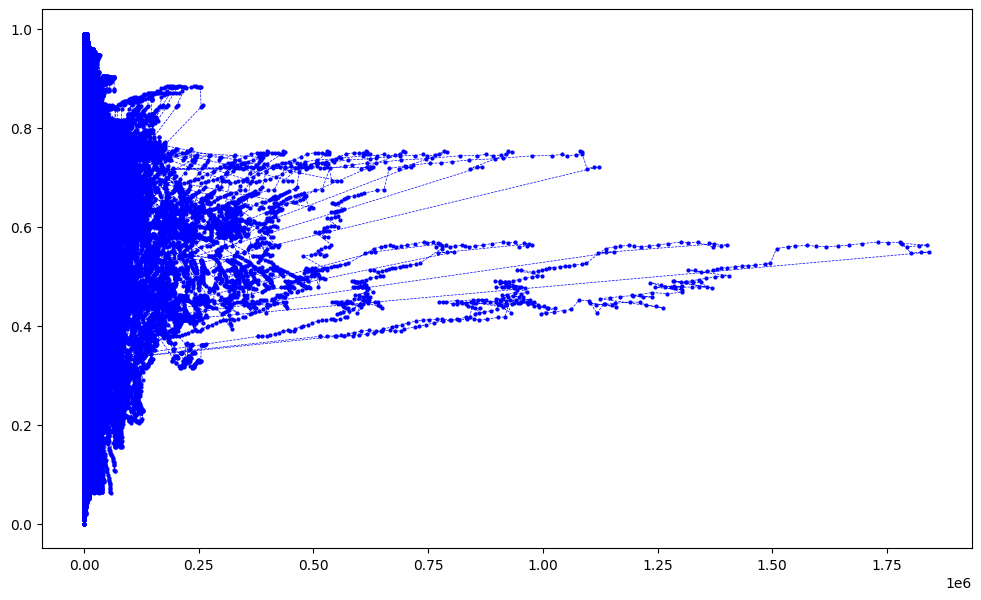

In [152]:
total_fam_ext_pob = df_cad_2012_2023_fx_renda_fam['ibge_6']
total_fam_ext_pob = df_cad_2012_2023_fx_renda_fam.pivot(index='referencia', columns='ibge_6', values='total_fam_ext_pob').sum()
total_fam_ext_pob.name = 'total_fam_ext_pob'
city_population = city_infecction[['codigo_ibge', 'populacaoTCU2019']].drop_duplicates().set_index('codigo_ibge')
city_infecction_and_population = pd.concat([city_infecction_sum, city_population], axis='columns')